# Homework DataAnalysis

#### By: María Paula Castañeda 

Using Pandas and Statsmodels write a Jupyter Notebook that: 

1. Uses the data from the Maddison Project to plot the evolution of total population across the world. 
2. Plots the evolution of the share of the world population by countries and WB regions.
3. Downloads fertility, mortality and life expectancy data from the WB and plots its evolution in the last 60 years.
4. Downloads mortality and life expectancy data (across regions and cohorts) from the [Human Mortality Database](https://www.mortality.org/) and plots its evolution.
5. Using this data analyze the convergence of life expectanty, mortality and fertility.

Submit your notebook as a ``pull request`` to the course's github repository.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import gc
import datetime
from os import listdir
from os.path import isfile, join
from os.path import isdir
from itertools import chain
import os

%matplotlib inline

#### Download the data  

In [2]:
import os

pathout = './data/'

if not os.path.exists(pathout):
    os.mkdir(pathout)
    
pathgraphs = './graphs/'
if not os.path.exists(pathgraphs):
    os.mkdir(pathgraphs)

In [3]:
try:
    maddison_new = pd.read_stata(pathout + 'Maddison2018.dta')
    maddison_new_region = pd.read_stata(pathout + 'Maddison2018_region.dta')
    maddison_new_1990 = pd.read_stata(pathout + 'Maddison2018_1990.dta')
except:
    maddison_new = pd.read_stata('https://www.rug.nl/ggdc/historicaldevelopment/maddison/data/mpd2018.dta')
    maddison_new.to_stata(pathout + 'Maddison2018.dta', write_index=False, version=117)
    maddison_new_region = pd.read_stata('https://www.rug.nl/ggdc/historicaldevelopment/maddison/data/mpd2018_region_data.dta')
    maddison_new_region.to_stata(pathout + 'Maddison2018_region.dta', write_index=False, version=117)
    maddison_new_1990 = pd.read_stata('https://www.rug.nl/ggdc/historicaldevelopment/maddison/data/mpd2018_1990bm.dta')
    maddison_new_1990.to_stata(pathout + 'Maddison2018_1990.dta', write_index=False, version=117)

In [4]:
maddison_new_region

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 50)

In [5]:
maddison_new_region.head(1000)

,region,region_name,year,cgdppc,rgdpnapc,pop
0,af,Africa,1870.0,NaN,NaN,NaN
1,af,Africa,1871.0,NaN,NaN,NaN
2,af,Africa,1872.0,NaN,NaN,NaN
3,af,Africa,1873.0,NaN,NaN,NaN
4,af,Africa,1874.0,NaN,NaN,NaN
...,...,...,...,...,...,...
995,wd,World,1973.0,6571.0,7307.0,3911007.0
996,wd,World,1974.0,6708.0,7419.0,3985621.0
997,wd,World,1975.0,6719.0,7409.0,4058425.0
998,wd,World,1976.0,6936.0,7659.0,4129019.0


In [46]:
pop_region = maddison_new_region.pivot_table(index='year',columns='region_name',values='pop',aggfunc='sum')

In [7]:
total_pop = maddison_new_region[maddison_new_region['region_name']=='World']

In [8]:
total_pop

,region,region_name,year,cgdppc,rgdpnapc,pop
968,wd,World,1870.0,1263.0,1502.0,1013941.0
969,wd,World,1890.0,1694.0,1933.0,1292040.0
970,wd,World,1913.0,2446.0,2710.0,1627706.0
971,wd,World,1929.0,2846.0,3243.0,1788473.0
972,wd,World,1950.0,3277.0,3670.0,2520873.0
973,wd,World,1951.0,3417.0,3826.0,2564725.0
974,wd,World,1952.0,3512.0,3936.0,2610876.0
975,wd,World,1953.0,3645.0,4080.0,2658730.0
976,wd,World,1954.0,3671.0,4130.0,2709557.0
977,wd,World,1955.0,3841.0,4322.0,2761536.0


Text(0.5, 1.0, 'Evolution of total population')

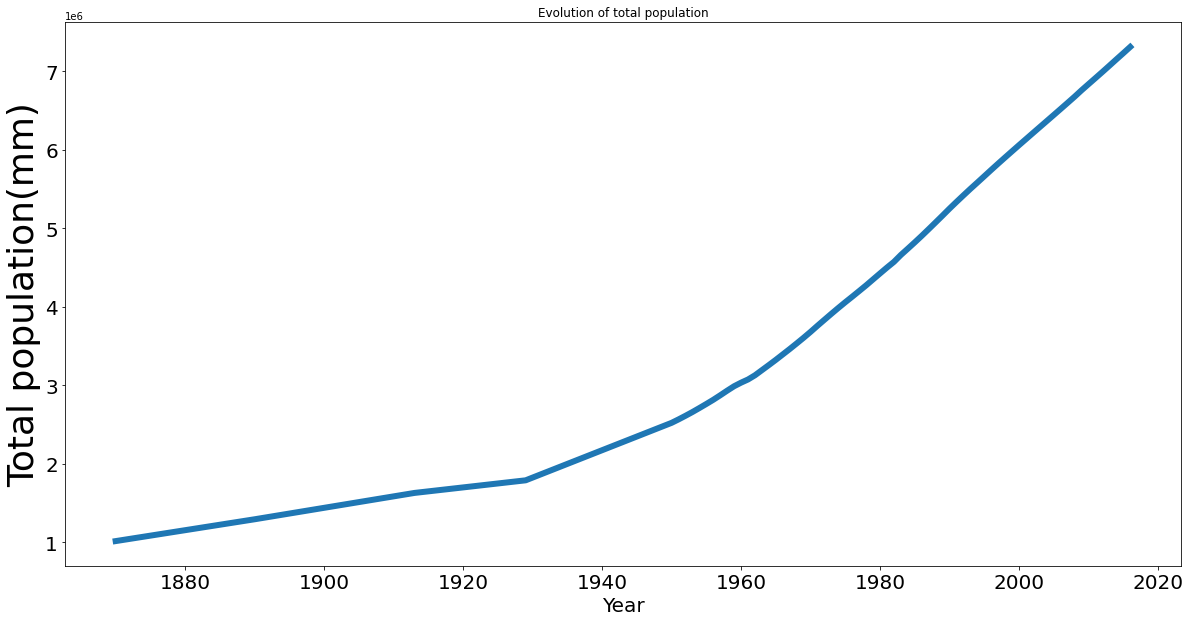

In [68]:
mycolors = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
fig, ax = plt.subplots(figsize=(20,10))
sns.lineplot(x='year', y='pop', data = total_pop.loc[total_pop.year>=1800].reset_index(drop=True), alpha=1, lw=6, palette=sns.\
             color_palette(mycolors), dashes=False, markers=False)
ax.tick_params(axis = 'both', which = 'major', labelsize=20)
ax.tick_params(axis = 'both', which = 'minor', labelsize=20)
ax.set_xlabel('Year', fontsize=20)
ax.set_ylabel('Total population(mm)', fontsize=36)
ax.set_title('Evolution of total population')

As can be seen in the graph, the world population has been growing, as is normal. But more or less since 1930, population growth has been more aggressive than it used to be and with a much more marked exponential trend 

In [47]:
pop_region['Africa_pop'] = ((pop_region.Africa / pop_region.World) * 100)
pop_region['EastAsia_pop'] = ((pop_region['East Asia'] / pop_region.World) * 100)
pop_region['EasternEurope_pop'] = ((pop_region['Eastern Europe'] / pop_region.World) * 100)
pop_region['LatinAmerica_pop'] = ((pop_region['Latin America'] / pop_region.World) * 100)
pop_region['WesternAsia_pop'] = ((pop_region['Western Asia'] / pop_region.World )* 100)
pop_region['WesternEurope_pop'] = ((pop_region['Western Europe'] / pop_region.World) * 100)
pop_region['WesternOffshoots_pop'] = ((pop_region['Western Offshoots'] / pop_region.World) * 100)

In [48]:
pop_region

region_name,Africa,East Asia,Eastern Europe,Latin America,Western Asia,Western Europe,Western Offshoots,World,Africa_pop,EastAsia_pop,EasternEurope_pop,LatinAmerica_pop,WesternAsia_pop,WesternEurope_pop,WesternOffshoots_pop
year,,,,,,,,,,,,,,,
1870.0,0.0,736845.0,0.0,39023.0,0.0,191985.0,46088.0,1013941.0,0.000000,72.671388,0.000000,3.848646,0.000000,18.934534,4.545432
1871.0,0.0,0.0,0.0,0.0,NaN,192273.0,46880.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1872.0,0.0,0.0,0.0,0.0,NaN,193136.0,48048.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1873.0,0.0,0.0,0.0,0.0,NaN,194416.0,49221.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1874.0,0.0,0.0,0.0,0.0,NaN,195825.0,50413.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1875.0,0.0,0.0,0.0,0.0,NaN,197267.0,51596.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1876.0,0.0,0.0,0.0,0.0,NaN,198994.0,52778.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1877.0,0.0,0.0,0.0,0.0,NaN,200743.0,53954.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1878.0,0.0,0.0,0.0,0.0,NaN,202304.0,55135.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
per_by_region = pop_region[['Africa_pop','EastAsia_pop','EasternEurope_pop','LatinAmerica_pop','WesternAsia_pop',
                           'WesternEurope_pop','WesternOffshoots_pop']]
per_by_region = per_by_region.dropna(axis=0)

Text(0.5, 1.0, 'Population Share by region')

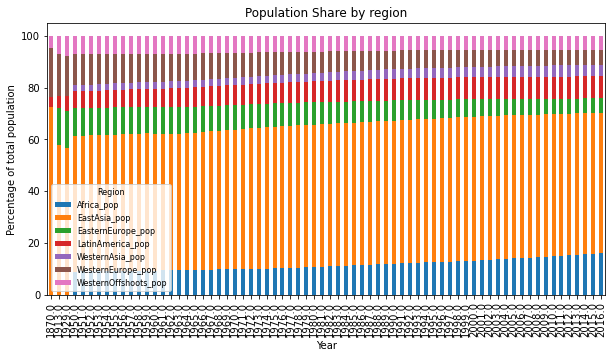

In [69]:
# Segundo punto 
fig, ax = plt.subplots(figsize=(10,5))
per_by_region.plot(ax = ax, kind='bar', stacked=True)
ax.tick_params(axis = 'y', which = 'major', labelsize=10)
ax.tick_params(axis = 'y', which = 'minor', labelsize=5)
ax.set_xlabel('Year', fontsize=10)
ax.set_ylabel('Percentage of total population', fontsize=10,)
ax.legend(prop={'size': 8}).set_title("Region", prop = {'size':8})
ax.set_title('Population Share by region')

At the level of share population we can see different trends.For example, on the European continent, both in the east and in the west, we can see that the percentage of participation in the world population has been gradually decreasing.This decline has been offset by an increase in the continents of Africa, Latin America and Western Asia.  

In [70]:
from pandas_datareader import data, wb

C:\Users\c804268\Anaconda3\envs\GeoPython38env\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [76]:
wbcountries = wb.get_countries()
wbcountries['name'] = wbcountries.name.str.strip()

In [77]:
demvars = ['SP.DYN.LE00.IN', 'SP.DYN.CDRT.IN', 'SP.DYN.TFRT.IN']
demvars
#SP.DYN.LE00.IN ; SP.DYN.CDRT.IN ; SP.DYN.TFRT.IN

['SP.DYN.LE00.IN', 'SP.DYN.CDRT.IN', 'SP.DYN.TFRT.IN']

In [78]:
wdi = wb.download(indicator=demvars, country=wbcountries.iso2c.values, start=1960, end=2020)

wdi

C:\Users\c804268\Anaconda3\envs\GeoPython38env\lib\site-packages\pandas_datareader\wb.py:593: UserWarning: Non-standard ISO country codes: 1A, 1W, 4E, 6D, 6F, 6L, 6N, 6X, 7E, 8S, A4, A5, A9, B1, B2, B3, B4, B6, B7, B8, C4, C5, C6, C7, C8, C9, D2, D3, D4, D5, D6, D7, D8, D9, EU, F1, F6, JG, L4, L5, L6, L7, M1, M2, N6, O6, OE, R6, S1, S2, S3, S4, T2, T3, T4, T5, T6, T7, V1, V2, V3, V4, XC, XD, XE, XF, XG, XH, XI, XJ, XK, XL, XM, XN, XO, XP, XQ, XT, XU, XY, Z4, Z7, ZB, ZF, ZG, ZJ, ZQ, ZT
  "Non-standard ISO " "country codes: %s" % tmp, UserWarning


SP.DYN.LE00.IN  SP.DYN.CDRT.IN  SP.DYN.TFRT.IN
country  year                                                
Aruba    2019             NaN             NaN             NaN
         2018          76.152           9.053           1.896
         2017          76.010           8.907           1.886
         2016          75.868           8.765           1.872
         2015          75.725           8.627           1.854
...                       ...             ...             ...
Zimbabwe 1964          54.849          13.083           7.347
         1963          54.403          13.419           7.311
         1962          53.946          13.762           7.267
         1961          53.483          14.104           7.215
         1960          53.019          14.441           7.158

[15840 rows x 3 columns]

In [79]:
wdi = wdi.groupby(['country', 'year']).max()
wdi.reset_index(inplace=True)
wdi

,country,year,SP.DYN.LE00.IN,SP.DYN.CDRT.IN,SP.DYN.TFRT.IN
0,Afghanistan,1960,32.446,32.219,7.450
1,Afghanistan,1961,32.962,31.649,7.450
2,Afghanistan,1962,33.471,31.093,7.450
3,Afghanistan,1963,33.971,30.551,7.450
4,Afghanistan,1964,34.463,30.022,7.450
...,...,...,...,...,...
15835,Zimbabwe,2015,59.534,8.673,3.896
15836,Zimbabwe,2016,60.294,8.286,3.804
15837,Zimbabwe,2017,60.812,8.044,3.707
15838,Zimbabwe,2018,61.195,7.883,3.615


In [102]:
wdi_world = wdi[wdi['country']=='World']
wdi_world.columns = ['country', 'year', 'Life expectancy (N of years)', 'Mortality rate (%)', 'Fetility rate (%)']
wdi_world = wdi_world.drop(labels=['country'],axis=1)
wdi_world

,year,Life expectancy (N of years),Mortality rate (%),Fetility rate (%)
15600,1960,52.578207,17.714523,4.980164
15601,1961,53.079382,14.999311,5.002610
15602,1962,53.496641,13.952690,5.024376
15603,1963,54.021867,13.735706,5.044543
15604,1964,54.691761,13.790592,5.055467
15605,1965,55.350941,13.205631,5.039725
15606,1966,56.082435,12.863195,4.990957
15607,1967,56.787124,12.600419,4.972429
15608,1968,57.386255,12.459614,4.922101
15609,1969,57.995421,12.266570,4.855154


Text(0.5, 1.0, 'Demographic variables')

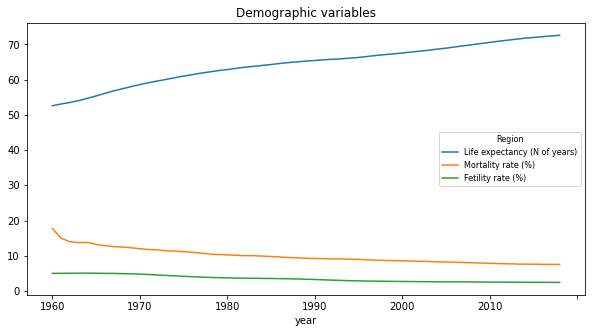

In [103]:
# Segundo punto 
fig, ax = plt.subplots(figsize=(10,5))
wdi_world.plot.line(ax = ax, x='year')
ax.tick_params(axis = 'both', which = 'major', labelsize=10)
ax.tick_params(axis = 'both', which = 'minor', labelsize=5)
ax.set_xlabel('year', fontsize=10)
ax.legend(prop={'size': 8}).set_title("Region", prop = {'size':8})
ax.set_title('Demographic variables')

The advances in life expectancy are undeniable, as the graph shows life expectancy has grown by nearly 20 years between 1960 and the present. This has been possible thanks to scientific and health advances that have allowed us to develop vaccines, treatments and medicines that have prolonged people's lives. On the other hand, while life expectancy has been increasing, fertility and mortality rates have been falling as a result of different factors. In the case of fertility, there are many theories that account for this phenomenon of declining fertility such as the more active participation of women in the economy, government controls, change in preferences, among others.

In [31]:
path_daily = "C:/Users/c804268/Documents/Curso_verano/E0coh/"
daily = []
daily.append([f for f in listdir(path_daily) if isfile(join(path_daily, f))])
daily_ = list(chain(*daily))
daily_

['CHE.E0coh.txt',
 'DNK.E0coh.txt',
 'FIN.E0coh.txt',
 'FRACNP.E0coh.txt',
 'FRATNP.E0coh.txt',
 'GBRTENW.E0coh.txt',
 'ISL.E0coh.txt',
 'ITA.E0coh.txt',
 'NLD.E0coh.txt',
 'NOR.E0coh.txt',
 'SWE.E0coh.txt']

In [32]:
pop_total = pd.DataFrame()
for file in daily_:
    pop_temp = pd.read_fwf(path_daily+file, colspecs=[(0,12), (12,22), (22,31), (31,36)], skiprows=range(2))
    pop_temp["country"] = file[:3]
    pop_total = pd.concat([pop_total, pop_temp], axis=0)

In [33]:
prueba_df = pd.read_fwf(path_daily+daily_[0], colspecs=[(0,12), (12,22), (22,31), (31,36)], skiprows=range(2))
prueba_df["country"] = daily_[0][:3]

In [34]:
pop_total["country"].unique()

array(['CHE', 'DNK', 'FIN', 'FRA', 'GBR', 'ISL', 'ITA', 'NLD', 'NOR',
       'SWE'], dtype=object)

C:\Users\c804268\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Life expectancy (years)')

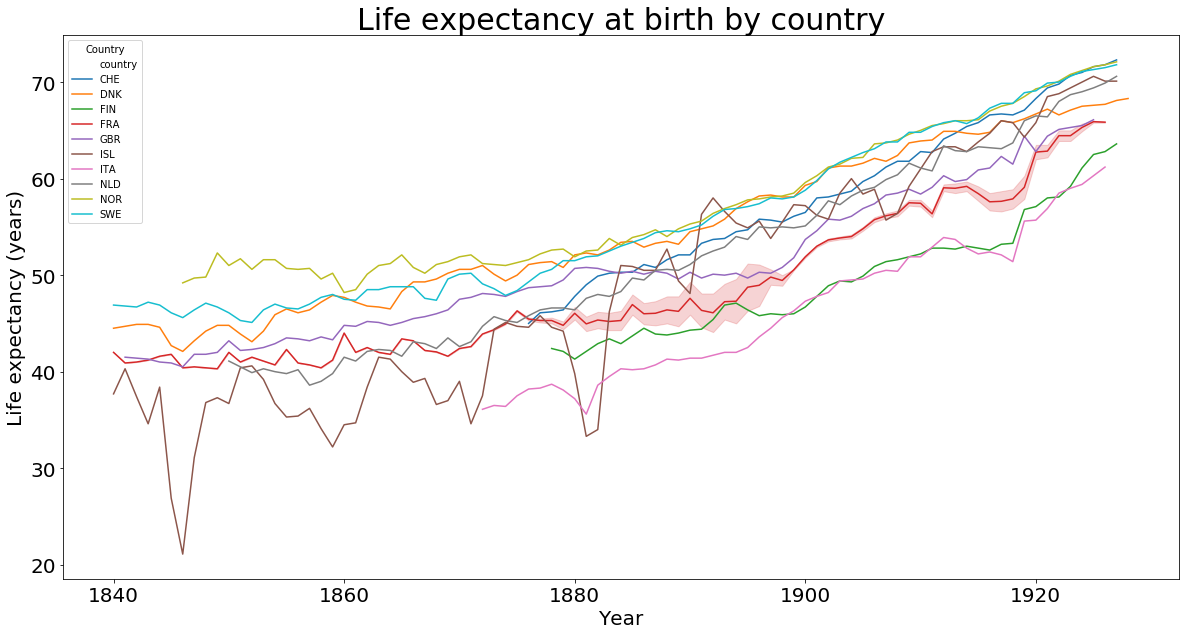

In [93]:
fig, ax = plt.subplots(figsize=(20,10))
sns.lineplot(x="Year", y="Tota", hue="country", data=pop_total.loc[pop_total.Year>=1840].reset_index(drop=True))
ax.tick_params(axis = 'both', which = 'major', labelsize=20)
ax.tick_params(axis = 'both', which = 'minor', labelsize=10)
ax.set_title("Life expectancy at birth by country", fontsize=30)
ax.legend(title='Country', prop={'size': 10})
ax.set_xlabel('Year', fontsize=20)
ax.set_ylabel('Life expectancy (years)', fontsize=20)

By region, we see the same behavior as in the previous graph, i.e. an increase in life expectancy over time. And, although different dynamics are observed among countries, the trend in all countries is upward. 
You can also see that the Nordic countries have the longest life expectancy and this has been the case since 1840. These countries are characterized by a higher per capita GDP than the rest. 


In [58]:
path_death = "C:/Users/c804268/Documents/Curso_verano/cMx_1x1/"
death = []
death.append([f for f in listdir(path_death) if isfile(join(path_death, f))])
death_ = list(chain(*death))
death_

['AUS.cMx_1x1.txt',
 'AUT.cMx_1x1.txt',
 'BEL.cMx_1x1.txt',
 'BGR.cMx_1x1.txt',
 'BLR.cMx_1x1.txt',
 'CAN.cMx_1x1.txt',
 'CHE.cMx_1x1.txt',
 'CZE.cMx_1x1.txt',
 'DEUTW.cMx_1x1.txt',
 'DNK.cMx_1x1.txt',
 'ESP.cMx_1x1.txt',
 'EST.cMx_1x1.txt',
 'FIN.cMx_1x1.txt',
 'FRATNP.cMx_1x1.txt',
 'GBRTENW.cMx_1x1.txt',
 'GRC.cMx_1x1.txt',
 'HKG.cMx_1x1.txt',
 'HUN.cMx_1x1.txt',
 'IRL.cMx_1x1.txt',
 'ISL.cMx_1x1.txt',
 'ISR.cMx_1x1.txt',
 'ITA.cMx_1x1.txt',
 'JPN.cMx_1x1.txt',
 'LTU.cMx_1x1.txt',
 'LUX.cMx_1x1.txt',
 'LVA.cMx_1x1.txt',
 'NLD.cMx_1x1.txt',
 'NOR.cMx_1x1.txt',
 'NZL_NP.cMx_1x1.txt',
 'POL.cMx_1x1.txt',
 'PRT.cMx_1x1.txt',
 'RUS.cMx_1x1.txt',
 'SVK.cMx_1x1.txt',
 'SVN.cMx_1x1.txt',
 'SWE.cMx_1x1.txt',
 'TWN.cMx_1x1.txt',
 'UKR.cMx_1x1.txt',
 'USA.cMx_1x1.txt']

In [87]:
pop_total_death = pd.DataFrame()
for file in death_:
    pop_temp = pd.read_fwf(path_death+file, colspecs=[(0,15), (15,30), (30,46), (46,62), (62,70)], skiprows=range(2),dec=".")
    pop_temp["country"] = file[:3]
    pop_total_death = pd.concat([pop_total_death, pop_temp], axis=0)

In [105]:
pop_total_death = pop_total_death.dropna(axis=0, subset=['Male','Female','Total'])

In [104]:
pop_total_death['Total'] = pop_total_death['Total'].astype('float', errors='ignore')

In [107]:
pop_total_death

,Year,Age,Female,Male,Total,country
76,1845,76,0.079508,0.089925,0.08463,AUS
77,1845,77,0.080456,0.092855,0.08658,AUS
78,1845,78,0.099880,0.116743,0.10808,AUS
79,1845,79,0.089952,0.115996,0.10258,AUS
80,1845,80,0.114155,0.138994,0.12567,AUS
81,1845,81,0.096786,0.127029,0.11059,AUS
82,1845,82,0.123783,0.149042,0.13514,AUS
83,1845,83,0.137633,0.165190,0.14986,AUS
84,1845,84,0.157658,0.186085,0.17006,AUS
85,1845,85,0.155090,0.180453,0.16598,AUS
